In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../../clean_data.csv")


Original rows: 6683
Remaining after outlier removal: 5709


/var/folders/hd/3b5ptsrd3jn3s9zm5flfrg3h0000gn/T/ipykernel_59821/2247875881.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_no_outliers, x='Number of rooms', y='Price',


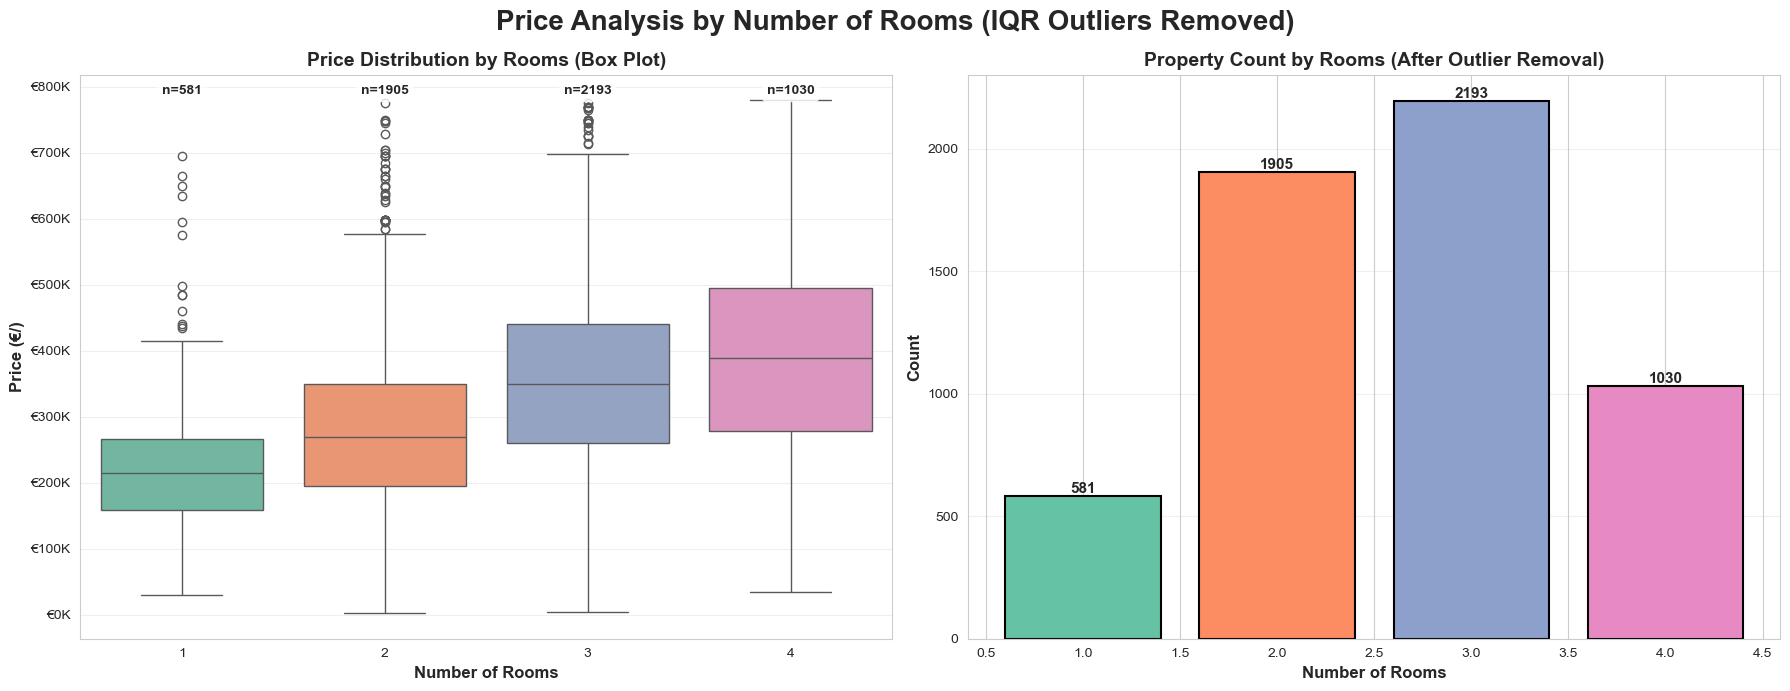

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def remove_outliers_iqr(df, columns):
    """
    Remove outliers from specified columns in a DataFrame using the IQR (Interquartile Range) method.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame
        columns (list): List of column names to apply outlier removal on
        
    Returns:
        pd.DataFrame: A DataFrame with outliers removed
    """
    
    df_clean = df.copy()
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
        
    return df_clean

sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

df = pd.read_csv('../../clean_data_0.csv')

data = df.dropna(subset=['Number of rooms', 'Price']).copy()
data['Number of rooms'] = data['Number of rooms'].astype(int)

data_filtered = data[data['Number of rooms'].between(1, 10)]



data_no_outliers = remove_outliers_iqr(data_filtered, ['Price', 'Number of rooms'])
# data_no_outliers = data_filtered

print(f"Original rows: {len(data_filtered)}")
print(f"Remaining after outlier removal: {len(data_no_outliers)}")

# --------- Plotting ---------
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Price Analysis by Number of Rooms (IQR Outliers Removed)', 
             fontsize=20, fontweight='bold')

### Boxplot ###
ax1 = axes[0]
sns.boxplot(data=data_no_outliers, x='Number of rooms', y='Price',
            palette='Set2', ax=ax1)

ax1.set_title('Price Distribution by Rooms (Box Plot)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Rooms', fontsize=12, fontweight='bold')
ax1.set_ylabel('Price (€/)', fontsize=12, fontweight='bold')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x/1000:.0f}K'))
ax1.grid(axis='y', alpha=0.3)

# Sample counts per group
room_labels = sorted(data_no_outliers['Number of rooms'].unique())
for i, room in enumerate(room_labels):
    count = len(data_no_outliers[data_no_outliers['Number of rooms'] == room])
    ax1.text(i, ax1.get_ylim()[1] * 0.98, f'n={count}',
             ha='center', va='top', fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

### Bar Chart ###
ax2 = axes[1]
room_counts = data_no_outliers['Number of rooms'].value_counts().sort_index()
colors = sns.color_palette('Set2', n_colors=len(room_counts))
bars = ax2.bar(room_counts.index, room_counts.values, color=colors,
               edgecolor='black', linewidth=1.5)
ax2.set_title('Property Count by Rooms (After Outlier Removal)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Rooms', fontsize=12, fontweight='bold')
ax2.set_ylabel('Count', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('rooms_analysis_iqr_cleaned.png', dpi=300, bbox_inches='tight')
plt.show()


In [2]:
# Filter to sales
sale_df = df[df['Type of sale'] == 'Sale'].copy()

# Filter rent
rent_df = df[df['Type of sale'] == 'Rent'].copy()

In [3]:
locality_median_count_prices_sale = sale_df.groupby(['Locality name', 'Postal code']).agg({
    'Price': ['median', 'count']
}).reset_index()
display(locality_median_count_prices_sale)

Locality name Postal code      Price      
                                   median count
0          Aalbeke        8511   325000.0     1
1            Aalst        9300   299000.0    43
2           Aalter        9880   398000.0    11
3         Aarschot        3200   344000.0    10
4          Aarsele        8700   444000.0     2
...            ...         ...        ...   ...
1185       Épinois        7134   240000.0     2
1186        Éprave        5580   225000.0     1
1187        Érezée        6997   240000.0    13
1188        Étalle        6740   322109.0     5
1189      Évelette        5350  1995000.0     1

[1190 rows x 4 columns]

In [4]:
locality_median_count_prices_sale.columns

MultiIndex([('Locality name',       ''),
            (  'Postal code',       ''),
            (        'Price', 'median'),
            (        'Price',  'count')],
           )

In [5]:


# flatten the columns
locality_median_count_prices_sale.columns = [
    "_".join([str(c) for c in col if c])  
    for col in locality_median_count_prices_sale.columns
]

In [6]:
locality_median_count_prices_sale.columns

Index(['Locality name', 'Postal code', 'Price_median', 'Price_count'], dtype='object')

In [7]:
locality_median_count_prices_sale.sort_values(('Price_median'), ascending=False)

,Locality name,Postal code,Price_median,Price_count
143,Boekhoute,9961,2498000.0,1
775,Nieuwkerke,8950,2290000.0,1
1189,Évelette,5350,1995000.0,1
179,Brakel,9660,1950000.0,6
161,Bornival,1404,1900000.0,1
...,...,...,...,...
311,Esplechin,7502,70000.0,1
136,Blaimont,5542,68250.0,8
72,Baronville,5570,39900.0,1
245,Dailly,5660,34500.0,1
